# Regularizacion

Juan Abraham Zumaya Galvan 135611

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from __future__ import division
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from random import random

In [2]:
Location = r'C:\Users\hp\Desktop\learning_machine\clases\RegLin.csv' # Se obtiene la locazion del documento

In [3]:
df = pd.read_csv(Location)# Se leen los datos

In [4]:
df.describe()

,X,Y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [5]:
X = df[df.columns[0:-1]]
Y = df[df.columns[-1]]

In [6]:
X_train, X_test, Y_train, Y_test=train_test_split(df[['X']],df[['Y']],test_size=0.25)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

In [7]:
#Normalizamos
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

scalerY = preprocessing.StandardScaler().fit(Y_train)

Y_train=scalerY.transform(Y_train)
Y_test=scalerY.transform(Y_test)

In [18]:
def ajuste(X, Y,eta,lam):
    a=len(X[0,:])
    W1=np.ones(a+1)
    error=[]
    
    for i in range(0,len(X)):
        V=W1[0]*1+W1[1]*X[i]
        #for j in range(0,a):
           # V=V+W[j+1]*X[i,j]
        erroraux=Y[i]-V
        error.append(erroraux)
        W1[0]=W1[0]+erroraux*eta-lam*W1[0]
        for j in range(0,a):
              W1[j+1]=W1[j+1]+erroraux*eta*X[i,j]-lam*W1[j+1]
        
    return W1,error

# Ajuste con .5

In [19]:
W_05=ajuste(X_train,Y_train,.5,0)[0]
error_05=ajuste(X_train,Y_train,.5,0)[1]
W_05reg=ajuste(X_train,Y_train,.5,.001)[0]
error_05reg=ajuste(X_train,Y_train,.5,.001)[1]

In [20]:
W_05

array([ 0.22482425,  0.8474605 ])

In [21]:
W_05reg

array([ 0.22723338,  0.84721103])

In [36]:
indice=[]
for i in range(0,len(error_05)):
    indice.append(i)
plt.scatter(indice,error_05,color='green')
plt.plot(indice,error_05reg,color='blue')

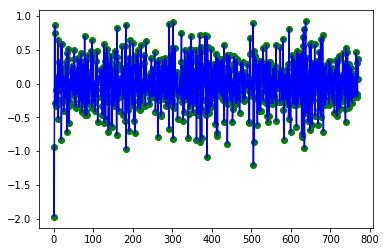

In [37]:
plt.show()

In [39]:
W_01=ajuste(X_train,Y_train,.1,0)[0]
error_01=ajuste(X_train,Y_train,.1,0)[1]
W_01reg=ajuste(X_train,Y_train,.1,.001)[0]
error_01reg=ajuste(X_train,Y_train,.1,.001)[1]

In [40]:
W_01

array([ 0.02700866,  0.92716417])

In [48]:
W_01reg

array([ 0.02838026,  0.91649766])